# 4.7

## a)

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d

In [26]:
x1, x2 = var('x1 x2', real=True)

dFdx1 = 0.05*x1*(1-x1/150_000)+0.02/500*x1*x2
dFdx2 = 0.25*x2*(1-x2/500)-0.10/150_000*x1*x2

#plot3d(dFdx1, (x1, 0, 150_000), (x2, 0, 500))

In [3]:
s = solve([dFdx1, dFdx2], [x1, x2], dict=True, rational=True)
s

[{x1: 0, x2: 0},
 {x1: 0, x2: 500},
 {x1: 150000, x2: 0},
 {x1: 5250000/29, x2: 7500/29}]

## b)

<ipython-input-20-1b7e8c63cbe9>:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


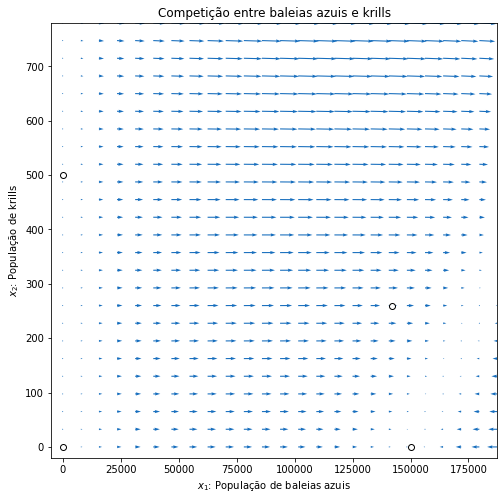

In [20]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

maxx2 = 780#500*1.25
maxx1 = 150_000*1.25

x1graf, x2graf = np.meshgrid(np.linspace(0, maxx1, 25), np.linspace(0, maxx2, 25))

f1 = 0.05*x1graf*(1-x1graf/150_000) + (0.02/500)*x1graf*x2graf
f2 = 0.25*x2graf*(1-x2graf/500) - (0.10/150_000)*x1graf*x2graf

plt.quiver(x1graf, x2graf, f1, f2, color='#156dbd')

plt.scatter([0, 0, 150000, 373991*11/29], [0, 500, 0, 7500/29], marker='o', edgecolors='black', color='w')

ax = plt.axes()
ax.set_title("Competição entre baleias azuis e krills")
ax.set_xlabel('$x_1$: População de baleias azuis')
ax.set_ylabel('$x_2$: População de krills')
ax.set_xlim([-5000, maxx1])
ax.set_ylim([-20, maxx2])

plt.show()

In [5]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [dFdx1x1, dFdx1x2],
    [dFdx2x1, dFdx2x2]
])
simplify(H, rational=True)

Matrix([
[-x1/1500000 + x2/25000 + 1/20,                    x1/25000],
[                  -x2/1500000, -x1/1500000 - x2/1000 + 1/4]])

In [6]:
for solucao in s:
    print('Solução: ', solucao)
    display(simplify(H.subs(solucao), rational=True))
    print('Autovalores: ')
    display(simplify(H.subs(solucao), rational=True).eigenvals())
    print('------------')

Solução:  {x1: 0, x2: 0}


Matrix([
[0.05,    0],
[   0, 0.25]])

Autovalores: 


{0.0500000000000000: 1, 0.250000000000000: 1}

------------
Solução:  {x1: 0, x2: 500}


Matrix([
[                 0.07,     0],
[-0.000333333333333333, -0.25]])

Autovalores: 


{0.0700000000000000: 1, -0.250000000000000: 1}

------------
Solução:  {x1: 150000, x2: 0}


Matrix([
[-0.05,  6.0],
[    0, 0.15]])

Autovalores: 


{-0.0500000000000000: 1, 0.150000000000000: 1}

------------
Solução:  {x1: 5250000/29, x2: 7500/29}


Matrix([
[  -0.0603448275862069,   7.24137931034483],
[-0.000172413793103448, -0.129310344827586]])

Autovalores: 


{-0.0948275862068966 - 0.00771057923275785*I: 1,
 -0.0948275862068966 + 0.00771057923275785*I: 1}

------------
